# Домашнее задание №6

В этом домашнем задании нам нужно закрепить основы теорвера и статистики.

Отправить ДЗ можно на почту tixons.work@gmail.com

Для этого необходимо выставить уровень доступа на комментирование (share -> Get shareable link -> anyone with that link can view)
и отправить мне полученную ссылку. Альтернативно можно приложить файл .ipynb с вашим решением.

Сроки выполнения:

* мягкий дедлайн 22.06.2020
* жесткий дедлайн 29.06.2020

Мягкий дедлайн предполагает отправку обратной связи и комментарии по выполнению.
После жесткого дедлайна задания не принимаются.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задача №1 (2б)+++

(2 балла) Предположим Вы покупаете новый телефон, 80% покупателей удовлетворены покупкой. На каждой странице по 20 отзывов. Вы наугад выбираете одну из страниц отзывов, найдите вероятности обнаружить 12, 16 и 19 положительных отзывов.

In [2]:
import math

# вероятность того, что событие  наступит ровно k раз из n рассчитвается по формуле Бернулли

p = 0.8 #вероятность наступления события
n = 20
k1 = 12
k2 = 16
k3 = 19

def combination(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

def Bernoulli_distribution(n, k, p):
    q = 1 - p
    C_n_k = combination(n, k)
    return C_n_k * p ** k * q ** (n-k)

In [3]:
print(f'Вероятность найти {k1} положительных отзывов = {Bernoulli_distribution(n, k1, p)}')
print(f'Вероятность найти {k2} положительных отзывов = {Bernoulli_distribution(n, k2, p)}')
print(f'Вероятность найти {k3} положительных отзывов = {Bernoulli_distribution(n, k3, p)}')


Вероятность найти 12 положительных отзывов = 0.022160876760150806
Вероятность найти 16 положительных отзывов = 0.21819940194610052
Вероятность найти 19 положительных отзывов = 0.057646075230342396


# Задача №2 (2б)+++

(1 балл) Опираясь на задачу 2 найти вероятность того, не менее 2/5 всех отзывов на случайно выбранной странице будут негативными. +++

In [4]:
# то же самое, что не более 12 будут положительными
prob = np.sum(np.array([Bernoulli_distribution(n, i, p) for i in range(0, 13)]))
prob

0.032142663080875086

(1 балл) Построить гистограмму вероятностей обнаружения положительных отзывов на странице. +++

Text(0, 0.5, 'Вероятность')

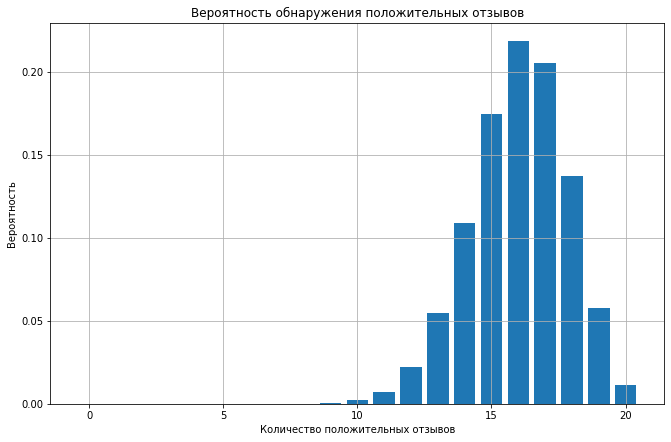

In [5]:
# я думаю, что 20 элемент тоже нужно включить
# так как должна быть вероятность увидеть 20 положительных отзывов из 20

plt.figure(figsize=[11,7])
probability = np.array([Bernoulli_distribution(n, i, p) for i in range(21)])
ind = np.array([i for i in range(21)])
plt.bar(ind, probability)
plt.grid()
plt.title('Вероятность обнаружения положительных отзывов')
plt.xlabel('Количество положительных отзывов')
plt.ylabel('Вероятность')

# Задача №2 (4б) +++

Предположим у вас имеется датасет с описанием людей и меткой ' <=50K', которая показывает, получает ли человек (в США) более или менее 50к$ в год. Используя теорему Байеса покажите, что с ростом образования вероятность получать >50k в год растет.

Код загрузки данных и результирующая таблица предоставлены.

[Подсказка, теорема Байеса говорит нам, что

$$P( > или < 50k|класс-образования) = \frac{P(класс-образования | > или < 50k) * P(> или < 50k)}{P(наблюдать-этот-класс-образования)}$$


Для лаконичной агрегации данных в pandas встроена функция [group by](https://realpython.com/pandas-groupby/)
]

In [6]:
df_temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [7]:
df_temp.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df = df_temp[[' Bachelors', ' <=50K']]
# работаем конкретно с этой таблицей
df.head()

,Bachelors,<=50K
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K


In [9]:
# посчитаем общее количество данных

count = df[' Bachelors'].count()
count

32560

In [10]:
# посчитаем количество людей по классу образования

df.groupby(' Bachelors')[' Bachelors'].count()

 Bachelors
 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5354
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
Name:  Bachelors, dtype: int64

In [11]:
# сгруппируем 

df.groupby([' Bachelors',' <=50K'])[' <=50K'].count()

 Bachelors      <=50K
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3133
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
Name:  <=50K, dtype: int64

In [12]:
# создадим шаблон новго датафрейма

df_new = pd.DataFrame(df.groupby([' Bachelors',' <=50K'])[' <=50K'].count())
df_new

<=50K
 Bachelors     <=50K        
 10th          <=50K     871
               >50K       62
 11th          <=50K    1115
               >50K       60
 12th          <=50K     400
               >50K       33
 1st-4th       <=50K     162
               >50K        6
 5th-6th       <=50K     317
               >50K       16
 7th-8th       <=50K     606
               >50K       40
 9th           <=50K     487
               >50K       27
 Assoc-acdm    <=50K     802
               >50K      265
 Assoc-voc     <=50K    1021
               >50K      361
 Bachelors     <=50K    3133
               >50K     2221
 Doctorate     <=50K     107
               >50K      306
 HS-grad       <=50K    8826
               >50K     1675
 Masters       <=50K     764
               >50K      959
 Preschool     <=50K      51
 Prof-school   <=50K     153
               >50K      423
 Some-college  <=50K    5904
               >50K     1387

In [13]:
# посчитаем кол-во строк в новом датафрейме

df_new.count()

 <=50K    31
dtype: int64

In [14]:
people_ed_class = df.groupby(' Bachelors')[' Bachelors'].count().to_numpy()
people_ed_class_to_frame = np.array([people_ed_class[i // 2] if i < 27 else people_ed_class[(i + 1) // 2] 
                                     for i in range(31)])
people_ed_class_to_frame

array([  933,   933,  1175,  1175,   433,   433,   168,   168,   333,
         333,   646,   646,   514,   514,  1067,  1067,  1382,  1382,
        5354,  5354,   413,   413, 10501, 10501,  1723,  1723,    51,
         576,   576,  7291,  7291], dtype=int64)

In [15]:
# занесём в таблицу количество людей по классу образования

df_new['Всего людей по классу образования'] = people_ed_class_to_frame
df_new

<=50K  Всего людей по классу образования
 Bachelors     <=50K                                           
 10th          <=50K     871                                933
               >50K       62                                933
 11th          <=50K    1115                               1175
               >50K       60                               1175
 12th          <=50K     400                                433
               >50K       33                                433
 1st-4th       <=50K     162                                168
               >50K        6                                168
 5th-6th       <=50K     317                                333
               >50K       16                                333
 7th-8th       <=50K     606                                646
               >50K       40                                646
 9th           <=50K     487                                514
               >50K       27                                514
 Assoc-acdm    <=50K     802                               1067
               >50K      265                               1067
 Assoc-voc     <=50K    1021                               1382
               >50K      361                               1382
 Bachelors     <=50K    3133                               5354
               >50K     2221                               5354
 Doctorate     <=50K     107                                413
               >50K      306                                413
 HS-grad       <=50K    8826                              10501
               >50K     1675                              10501
 Masters       <=50K     764                               1723
               >50K      959                               1723
 Preschool     <=50K      51                                 51
 Prof-school   <=50K     153                                576
               >50K      423                                576
 Some-college  <=50K    5904                               7291
               >50K     1387                               7291

In [16]:
# занесём в таблицу вероятность обнаружения класса образования

p_ed_class = people_ed_class_to_frame / count
df_new['P(наблюдать этот класс образования)'] = p_ed_class
df_new

<=50K  Всего людей по классу образования  \
 Bachelors     <=50K                                              
 10th          <=50K     871                                933   
               >50K       62                                933   
 11th          <=50K    1115                               1175   
               >50K       60                               1175   
 12th          <=50K     400                                433   
               >50K       33                                433   
 1st-4th       <=50K     162                                168   
               >50K        6                                168   
 5th-6th       <=50K     317                                333   
               >50K       16                                333   
 7th-8th       <=50K     606                                646   
               >50K       40                                646   
 9th           <=50K     487                                514   
               >50K       27                                514   
 Assoc-acdm    <=50K     802                               1067   
               >50K      265                               1067   
 Assoc-voc     <=50K    1021                               1382   
               >50K      361                               1382   
 Bachelors     <=50K    3133                               5354   
               >50K     2221                               5354   
 Doctorate     <=50K     107                                413   
               >50K      306                                413   
 HS-grad       <=50K    8826                              10501   
               >50K     1675                              10501   
 Masters       <=50K     764                               1723   
               >50K      959                               1723   
 Preschool     <=50K      51                                 51   
 Prof-school   <=50K     153                                576   
               >50K      423                                576   
 Some-college  <=50K    5904                               7291   
               >50K     1387                               7291   

                      P(наблюдать этот класс образования)  
 Bachelors     <=50K                                       
 10th          <=50K                             0.028655  
               >50K                              0.028655  
 11th          <=50K                             0.036087  
               >50K                              0.036087  
 12th          <=50K                             0.013299  
               >50K                              0.013299  
 1st-4th       <=50K                             0.005160  
               >50K                              0.005160  
 5th-6th       <=50K                             0.010227  
               >50K                              0.010227  
 7th-8th       <=50K                             0.019840  
               >50K                              0.019840  
 9th           <=50K                             0.015786  
               >50K                              0.015786  
 Assoc-acdm    <=50K                             0.032770  
               >50K                              0.032770  
 Assoc-voc     <=50K                             0.042445  
               >50K                              0.042445  
 Bachelors     <=50K                             0.164435  
               >50K                              0.164435  
 Doctorate     <=50K                             0.012684  
               >50K                              0.012684  
 HS-grad       <=50K                             0.322512  
               >50K                              0.322512  
 Masters       <=50K                             0.052918  
               >50K                              0.052918  
 Preschool     <=50K                             0.001566  
 Prof-school   <=50K                             0.017690  
           

In [17]:
# посчитаем кол-во людей по зарплатам

df.groupby(' <=50K')[' <=50K'].count()

 <=50K
 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [18]:
# посчитаем вероятность обнаружения класса зарпалты

salary = df.groupby(' <=50K')[' <=50K'].count().to_numpy()
p_salary = np.array([salary[i] / count for i in range(2)])
p_salary

array([0.75918305, 0.24081695])

In [19]:
# занесём вероятность обнаружения класса зарпалты в таблицу

p_salary_class_to_frame = np.array([p_salary[i % 2] if i < 27 else p_salary[(i + 1) % 2]
                                    for i in range(31)])

df_new['P(> или < 50k)'] = p_salary_class_to_frame
df_new

<=50K  Всего людей по классу образования  \
 Bachelors     <=50K                                              
 10th          <=50K     871                                933   
               >50K       62                                933   
 11th          <=50K    1115                               1175   
               >50K       60                               1175   
 12th          <=50K     400                                433   
               >50K       33                                433   
 1st-4th       <=50K     162                                168   
               >50K        6                                168   
 5th-6th       <=50K     317                                333   
               >50K       16                                333   
 7th-8th       <=50K     606                                646   
               >50K       40                                646   
 9th           <=50K     487                                514   
               >50K       27                                514   
 Assoc-acdm    <=50K     802                               1067   
               >50K      265                               1067   
 Assoc-voc     <=50K    1021                               1382   
               >50K      361                               1382   
 Bachelors     <=50K    3133                               5354   
               >50K     2221                               5354   
 Doctorate     <=50K     107                                413   
               >50K      306                                413   
 HS-grad       <=50K    8826                              10501   
               >50K     1675                              10501   
 Masters       <=50K     764                               1723   
               >50K      959                               1723   
 Preschool     <=50K      51                                 51   
 Prof-school   <=50K     153                                576   
               >50K      423                                576   
 Some-college  <=50K    5904                               7291   
               >50K     1387                               7291   

                      P(наблюдать этот класс образования)  P(> или < 50k)  
 Bachelors     <=50K                                                       
 10th          <=50K                             0.028655        0.759183  
               >50K                              0.028655        0.240817  
 11th          <=50K                             0.036087        0.759183  
               >50K                              0.036087        0.240817  
 12th          <=50K                             0.013299        0.759183  
               >50K                              0.013299        0.240817  
 1st-4th       <=50K                             0.005160        0.759183  
               >50K                              0.005160        0.240817  
 5th-6th       <=50K                             0.010227        0.759183  
               >50K                              0.010227        0.240817  
 7th-8th       <=50K                             0.019840        0.759183  
               >50K                              0.019840        0.240817  
 9th           <=50K                             0.015786        0.759183  
               >50K                              0.015786        0.240817  
 Assoc-acdm    <=50K                             0.032770        0.759183  
               >50K                              0.032770        0.240817  
 Assoc-voc     <=50K                             0.042445        0.759183  
               >50K                              0.042445        0.240817  
 Bachelors     <=50K                             0.164435        0.759183  
               >50K                              0.164435        0.240817  
 Doctorate     <=50K                             0.012684        0.759183  
               >50K                              0.012684      

In [20]:
# посчитаем P(класс образования | > или < 50k) по формуле условной вероятности : P(A|B) = P(A & B) / P(B)

people_ed_class_and_salary = df.groupby([' Bachelors',' <=50K'])[' <=50K'].count().to_numpy() # A & B
p_people_ed_class_and_salary = people_ed_class_and_salary / count # P(A & B)
p_ed_class_salary = p_people_ed_class_and_salary / p_salary_class_to_frame # P(A|B) = P(A & B) / P(B)

df_new['P(класс образования | > или < 50k)'] = p_ed_class_salary
df_new

<=50K  Всего людей по классу образования  \
 Bachelors     <=50K                                              
 10th          <=50K     871                                933   
               >50K       62                                933   
 11th          <=50K    1115                               1175   
               >50K       60                               1175   
 12th          <=50K     400                                433   
               >50K       33                                433   
 1st-4th       <=50K     162                                168   
               >50K        6                                168   
 5th-6th       <=50K     317                                333   
               >50K       16                                333   
 7th-8th       <=50K     606                                646   
               >50K       40                                646   
 9th           <=50K     487                                514   
               >50K       27                                514   
 Assoc-acdm    <=50K     802                               1067   
               >50K      265                               1067   
 Assoc-voc     <=50K    1021                               1382   
               >50K      361                               1382   
 Bachelors     <=50K    3133                               5354   
               >50K     2221                               5354   
 Doctorate     <=50K     107                                413   
               >50K      306                                413   
 HS-grad       <=50K    8826                              10501   
               >50K     1675                              10501   
 Masters       <=50K     764                               1723   
               >50K      959                               1723   
 Preschool     <=50K      51                                 51   
 Prof-school   <=50K     153                                576   
               >50K      423                                576   
 Some-college  <=50K    5904                               7291   
               >50K     1387                               7291   

                      P(наблюдать этот класс образования)  P(> или < 50k)  \
 Bachelors     <=50K                                                        
 10th          <=50K                             0.028655        0.759183   
               >50K                              0.028655        0.240817   
 11th          <=50K                             0.036087        0.759183   
               >50K                              0.036087        0.240817   
 12th          <=50K                             0.013299        0.759183   
               >50K                              0.013299        0.240817   
 1st-4th       <=50K                             0.005160        0.759183   
               >50K                              0.005160        0.240817   
 5th-6th       <=50K                             0.010227        0.759183   
               >50K                              0.010227        0.240817   
 7th-8th       <=50K                             0.019840        0.759183   
               >50K                              0.019840        0.240817   
 9th           <=50K                             0.015786        0.759183   
               >50K                              0.015786        0.240817   
 Assoc-acdm    <=50K                             0.032770        0.759183   
               >50K                              0.032770        0.240817   
 Assoc-voc     <=50K                             0.042445        0.759183   
               >50K                              0.042445        0.240817   
 Bachelors     <=50K                             0.164435        0.759183   
               >50K                              0.164435        0.240817   
 Doctorate     <=50K                             0.012684        0.759183   
               >50K                     

In [21]:
# посчитаем P( > или < 50k | класс образования) по теормеме байеса

p_salary_ed_class = p_ed_class_salary * p_salary_class_to_frame / p_ed_class
df_new['P( > или < 50k | класс образования)'] = p_salary_ed_class
df_new

<=50K  Всего людей по классу образования  \
 Bachelors     <=50K                                              
 10th          <=50K     871                                933   
               >50K       62                                933   
 11th          <=50K    1115                               1175   
               >50K       60                               1175   
 12th          <=50K     400                                433   
               >50K       33                                433   
 1st-4th       <=50K     162                                168   
               >50K        6                                168   
 5th-6th       <=50K     317                                333   
               >50K       16                                333   
 7th-8th       <=50K     606                                646   
               >50K       40                                646   
 9th           <=50K     487                                514   
               >50K       27                                514   
 Assoc-acdm    <=50K     802                               1067   
               >50K      265                               1067   
 Assoc-voc     <=50K    1021                               1382   
               >50K      361                               1382   
 Bachelors     <=50K    3133                               5354   
               >50K     2221                               5354   
 Doctorate     <=50K     107                                413   
               >50K      306                                413   
 HS-grad       <=50K    8826                              10501   
               >50K     1675                              10501   
 Masters       <=50K     764                               1723   
               >50K      959                               1723   
 Preschool     <=50K      51                                 51   
 Prof-school   <=50K     153                                576   
               >50K      423                                576   
 Some-college  <=50K    5904                               7291   
               >50K     1387                               7291   

                      P(наблюдать этот класс образования)  P(> или < 50k)  \
 Bachelors     <=50K                                                        
 10th          <=50K                             0.028655        0.759183   
               >50K                              0.028655        0.240817   
 11th          <=50K                             0.036087        0.759183   
               >50K                              0.036087        0.240817   
 12th          <=50K                             0.013299        0.759183   
               >50K                              0.013299        0.240817   
 1st-4th       <=50K                             0.005160        0.759183   
               >50K                              0.005160        0.240817   
 5th-6th       <=50K                             0.010227        0.759183   
               >50K                              0.010227        0.240817   
 7th-8th       <=50K                             0.019840        0.759183   
               >50K                              0.019840        0.240817   
 9th           <=50K                             0.015786        0.759183   
               >50K                              0.015786        0.240817   
 Assoc-acdm    <=50K                             0.032770        0.759183   
               >50K                              0.032770        0.240817   
 Assoc-voc     <=50K                             0.042445        0.759183   
               >50K                              0.042445        0.240817   
 Bachelors     <=50K                             0.164435        0.759183   
               >50K                              0.164435        0.240817   
 Doctorate     <=50K                             0.012684        0.759183   
               >50K                     

Из таблицы видно, что вероятность получать более 50 тыс $ в год растет с образованием. См. вероятности >50K у бакалавров, мастеров и докторов (0.414830, 0.556587, 0.740920 соответсвенно)

# Задача №4 (2б) +++

Пускай мы имеем 2 выборки нормально распределенных наблюдений. Проверить, различаются ли выборки между собой. (Полагаем уровень значимости p = 0,01)

In [22]:
from scipy import stats

np.random.seed(1346)
first = stats.norm.rvs(loc=5,scale=10,size=1000)
second = stats.norm.rvs(loc=5,scale=10,size=1000)

(array([ 11.,  33., 115., 183., 222., 206., 144.,  58.,  24.,   4.]),
 array([-23.37219053, -17.32136268, -11.27053482,  -5.21970697,
          0.83112088,   6.88194873,  12.93277658,  18.98360443,
         25.03443228,  31.08526013,  37.13608798]),
 <a list of 10 Patch objects>)

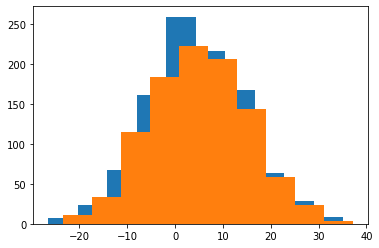

In [23]:
plt.hist(first)
plt.hist(second)

In [24]:
n = 1000

var_first = np.var(first, ddof = 1) 
var_second = np.var(second, ddof = 1)

mean_first = np.mean(first)
mean_second = np.mean(second)

s = np.sqrt((var_first + var_second) / 2)

t_value = (mean_first - mean_second) / (s * np.sqrt(2/n))
t_value

-2.0178105373601034

In [25]:
df = n*2 - 2 # количество степеней свободы

p_value = (1 - stats.t.cdf(abs(t_value), df)) * 2
p_value

0.043744438578759315

In [26]:
alpha = 0.01 # уровень значимости

if p_value > alpha:
	print(f'Принимаем гипотезу о равенстве на уровне занчимости {alpha}')
else:
	print(f'Отвергаем гипотезу о равенстве на уровне занчимости {alpha}')

Принимаем гипотезу о равенстве на уровне занчимости 0.01


In [27]:
# t-test используя scipy для проверки

t_value_scipy, p_value_scipy = stats.ttest_ind(first,second)

t_value_scipy

-2.017810537360104

In [28]:
p_value_scipy

0.04374443857875926

In [29]:
alpha = 0.01 # уровень значимости


if p_value_scipy > alpha:
	print(f'Принимаем гипотезу о равенстве на уровне занчимости {alpha}')
else:
	print(f'Отвергаем гипотезу о равенстве на уровне занчимости {alpha}')

Принимаем гипотезу о равенстве на уровне занчимости 0.01
